Here are the steps for this activity:

1. Run the following codes to generate two datasets.

2. Modify dataset generation by changing some parameters. For example, by changing 3 to 5 in the line of making collinearity.                             `x_multicollinearity = np.column_stack((x_no_multicollinearity[:, 0], 5 * x_no_multicollinearity[:, 0] + np.random.rand(size)))`  


3. Re-run the code: execute the modified code to see how the changes in the generated datasets are seen in the output figures. Also check the values calculated for the variance inflation factor (VIF).

4. Observe how this change affects the VIF results.


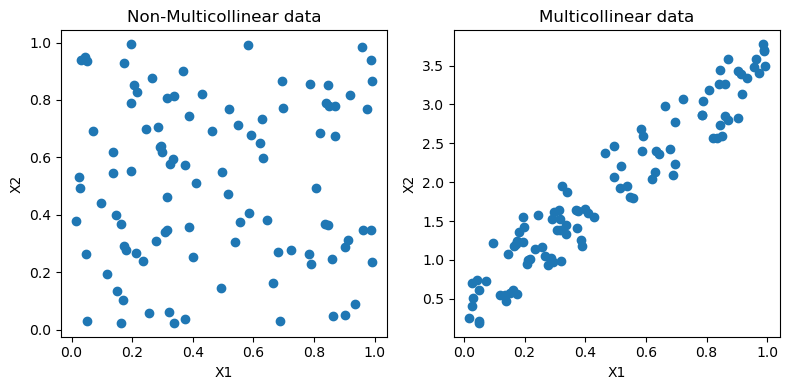

VIF Values:
Variable X0: 5.63321567126644
Variable X1: 12.230222351858377
Variable X2: 12.230222351858377


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Set random seed for reproducibility 
np.random.seed(30) 

# Function to generate datasets with and without multicollinearity 
def generate_datasets(size=100):

    # Independent variables for the dataset without multicollinearity 
    x_no_multicollinearity = np.random.rand(size, 2) 

    # Independent variables for the dataset with multicollinearity 
    x_multicollinearity = np.column_stack((x_no_multicollinearity[:, 0], 3 * x_no_multicollinearity[:, 0] + np.random.rand(size)))

    # True coefficients for the linear relationship 
    true_coefficients = np.array([1, 2]) 

    # Dependent variables for both datasets 
    y_no_multicollinearity = np.dot(x_no_multicollinearity, true_coefficients) + np.random.normal(0, 0.5, size) 
    y_multicollinearity = np.dot(x_multicollinearity, true_coefficients) + np.random.normal(0, 0.5, size) 
    
    return x_no_multicollinearity, y_no_multicollinearity, x_multicollinearity, y_multicollinearity 


# Generate datasets 
x_no_multicollinearity, y_no_multicollinearity, x_multicollinearity, y_multicollinearity = generate_datasets() 

# Plot datasets 
plt.figure(figsize=(8, 4)) 

# Plot dataset without multicollinearity 
plt.subplot(1, 2, 1) 
plt.scatter(x_no_multicollinearity[:, 0], x_no_multicollinearity[:, 1]) 
plt.title('Non-Multicollinear data') 
plt.xlabel('X1') 
plt.ylabel('X2') 

# Plot dataset with multicollinearity 
plt.subplot(1, 2, 2) 
plt.scatter(x_multicollinearity[:, 0], x_multicollinearity[:, 1]) 
plt.title('Multicollinear data') 
plt.xlabel('X1') 
plt.ylabel('X2') 
plt.tight_layout() 
plt.show() 

# Calculate VIF for the dataset with multicollinearity 

x_multicollinearity_with_intercept = sm.add_constant(x_multicollinearity) 
vif = [variance_inflation_factor(x_multicollinearity_with_intercept, i) for i in range(x_multicollinearity_with_intercept.shape[1])] 

# Display VIF values 

print("VIF Values:") 

for i, vif_value in enumerate(vif): 
    print(f"Variable X{i}: {vif_value}")